In [8]:

print(np.array(Z, dtype=np.float64))
print(Z)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ...
 ['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']]


/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_14840/2350052042.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],  c = ListedColormap(['#FA8072', '#1E90FF'])(0), cmap=ListedColormap(['#FA8072', '#1E90FF']), edgecolors='k', label='Train Data')
/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_14840/2350052042.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],  c = ListedColormap(['#FA8072', '#1E90FF'])(0), cmap=ListedColormap(['#FA8072', '#1E90FF']), edgecolors='k', label='Train Data')
/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipy

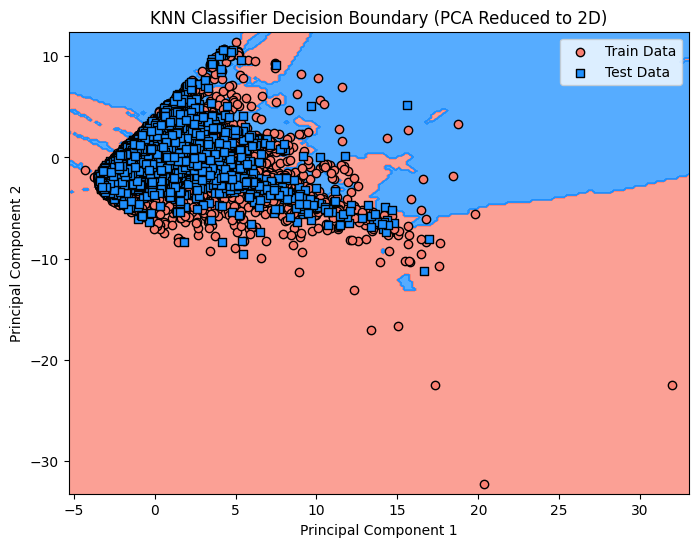

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

dataset = pd.read_csv('credit_card_defaults.csv')

X_original = dataset.iloc[1:, 1:-1].values
y_orignal = dataset.iloc[1:, -1].values

X = dataset.iloc[1:, 1:-1].values
y = dataset.iloc[1:, -1].values


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Create a meshgrid for decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict for meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, np.array(Z, dtype=np.float64),alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
#plt.contourf(xx, yy, np.array(Z, dtype=np.float64), alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],  c = ListedColormap(['#FA8072', '#1E90FF'])(0), cmap=ListedColormap(['#FA8072', '#1E90FF']), edgecolors='k', label='Train Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(1), cmap=ListedColormap(['#FA8072', '#1E90FF']), marker='s', edgecolors='k', label='Test Data')


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.title("KNN Classifier Decision Boundary (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()